To run this code:
1. download Glottolog newick tree from [here](https://cdstar.eva.mpg.de//bitstreams/EAEA0-B701-6328-C3E3-0/tree_glottolog_newick.txt).
2. download lookup table for Glottolog language code from [here](https://cdstar.eva.mpg.de//bitstreams/EAEA0-B701-6328-C3E3-0/glottolog_languoid.csv.zip)

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
path_to_tree = '/content/drive/MyDrive/cvae_project/codes/tree.txt'
path_to_csv = '/content/drive/MyDrive/cvae_project/codes/languoid.csv'

In [ ]:
# Read the downloaded tree structure, change this with your path to tree
with open(path_to_tree, 'r') as f:
    all_newick = f.read()

# target language list, change with your desired languages
target_list = [
    'Arabic', 'Tswana', 'Greek', 'Japanese', 'Polish', 'Middle-Modern Sinitic', 'Middle-Modern Persian',
    'Swedish', 'Russian', 'Macedonian', 'Korean', 'Czech', 'Aromanian',
    'Dutch', 'Spanish', 'Greater Panjabic', 'Norwegian', 'Bulgarian', 'Italian', 'Hungarian',
    'Mandarin Chinese', 'Lithuanian', 'Urdu', 'German', 'Yue Chinese', 'Turkish',
    'Serbian-Croatian-Bosnian', 'French', 'Portuguese', 'Serbian-Croatian-Bosnian', 'Finnish', 'Albanian', 'Thai',
    'Standard Indonesian', 'Hindi', 'Telugu', 'Vietnamese', 'Suundi', 'Mongolian', 'Farsic',
    'Zulu', 'Romanian', 'Swahili', 'Modern Hebrew', 'Central Oghuz', 'East Slavic',
    'Slovak',  'Igbo', 'Slovenian', 'Gujarati', 'Tamil', 'Pulaar',
    'Dhivehi', 'Mongolian', 'Sinhala', 'Welsh', 'Bengali', 'Catalan'
]

In [ ]:
import re
import csv

# This function parses a Newick tree format string and converts it into a hierarchical data structure.
# Newick is a notation used in bioinformatics and evolutionary biology to represent phylogenetic trees.

def parse(newick):
    tokens = re.finditer(r"([^:;,()]*)(?:\s*:\s*([\d.]+)\s*)?([,);])|(\S)", newick+";")

    def recurse(nextid = 0, parentid = -1): # one node
        thisid = nextid;
        children = []

        name, length, delim, ch = next(tokens).groups(0)
        if ch == "(":
            while ch in "(,":
                node, ch, nextid = recurse(nextid+1, thisid)
                children.append(node)
            name, length, delim, ch = next(tokens).groups(0)
        return {"id": thisid, "name": name, "length": float(length) if length else None,
                "parentid": parentid, "children": children}, delim, nextid

    return recurse()[0]

# Example use:
for i, value in parse("('A [a123]':0.1,'B [b123]':0.2,('C [c123]':0.3,'D [d123]':0.4)'E [e123]':0.5,'G [g123]':0.8)'F [f123]':0.9").items():
    print(i, value)

id 0
name 'F [f123]'
length 0.9
parentid -1
children [{'id': 1, 'name': "'A [a123]'", 'length': 0.1, 'parentid': 0, 'children': []}, {'id': 2, 'name': "'B [b123]'", 'length': 0.2, 'parentid': 0, 'children': []}, {'id': 3, 'name': "'E [e123]'", 'length': 0.5, 'parentid': 0, 'children': [{'id': 4, 'name': "'C [c123]'", 'length': 0.3, 'parentid': 3, 'children': []}, {'id': 5, 'name': "'D [d123]'", 'length': 0.4, 'parentid': 3, 'children': []}]}, {'id': 6, 'name': "'G [g123]'", 'length': 0.8, 'parentid': 0, 'children': []}]


In [ ]:
# take all the trees out from "all_newick" and parse them seperately
trees = []
for i in all_newick.strip().split('\n'):
    trees.append(parse(i))

In [ ]:
# This function searches for a target language code by language names

def find_glottolog_code(csv_file, target_value):
    target_code = None
    with open(csv_file, 'r') as file:
        csv_reader = csv.reader(file)
        for row in csv_reader:
            if row[3] == target_value:
                target_code = row[0]
                break
    return target_code

In [ ]:
language_code_list = []
for target in target_list:
    target_code = find_glottolog_code(path_to_csv, target)
    if target_code is not None:
        print(f"Matching code for {target}:", target_code)
        language_code_list.append(target_code)
    else:
        print(f"No matching code found for {target}.")


Matching code for Arabic: arab1395
Matching code for Tswana: tswa1253
Matching code for Greek: gree1276
Matching code for Japanese: nucl1643
Matching code for Polish: poli1260
Matching code for Middle-Modern Sinitic: midd1354
Matching code for Middle-Modern Persian: midd1352
Matching code for Swedish: swed1254
Matching code for Russian: russ1263
Matching code for Macedonian: mace1250
Matching code for Korean: kore1280
Matching code for Czech: czec1258
Matching code for Aromanian: arom1237
Matching code for Dutch: dutc1256
Matching code for Spanish: stan1288
Matching code for Greater Panjabic: lahn1241
Matching code for Norwegian: norw1258
Matching code for Bulgarian: bulg1262
Matching code for Italian: ital1282
Matching code for Hungarian: hung1274
Matching code for Mandarin Chinese: mand1415
Matching code for Lithuanian: lith1251
Matching code for Urdu: urdu1245
Matching code for German: stan1295
Matching code for Yue Chinese: yuec1235
Matching code for Turkish: nucl1301
Matching code

In [ ]:
# This function recursively traverses a tree data structure, searching for Glottolog codes within it,
# and records the path or parents of the nodes where these codes are found.

def recursive_read_tree(tree, parents, branch_record):
    for branch in tree:
        for glottolog_code in language_code_list:
            if glottolog_code in branch['name']:
                branch_record[branch['name']] = parents.copy()
        if branch['children'] != []:
            if parents:
                parents.append(branch['name'])
            else:
                parents = [branch['name']]
            branch_record = recursive_read_tree(branch['children'], parents, branch_record)
    return branch_record

In [ ]:
# pick out the tree structures of target languages
record = {}
for tree in trees:
    recursive_read_tree([tree], [], record)

In [ ]:
for key, value in record.items():
    print(f'{key}: depth {len(value)}')

'Central Oghuz [azer1255]': depth 46
'Turkish [nucl1301][tur]-l-': depth 61
'Albanian [alba1267][sqi]': depth 11
'Lithuanian [lith1251][lit]-l-': depth 38
'East Slavic [east1426]': depth 43
'Russian [russ1263][rus]-l-': depth 45
'Bulgarian [bulg1262][bul]-l-': depth 56
'Macedonian [mace1250][mkd]-l-': depth 62
'Serbian-Croatian-Bosnian [sout1528][hbs]-l-': depth 70
'Slovenian [slov1268][slv]-l-': depth 75
'Czech [czec1258][ces]-l-': depth 78
'Slovak [slov1269][slk]-l-': depth 80
'Polish [poli1260][pol]-l-': depth 83
'Welsh [wels1247][cym]-l-': depth 94
'Swedish [swed1254][swe]-l-': depth 125
'Norwegian [norw1258][nor]-l-': depth 133
'German [stan1295][deu]-l-': depth 188
'Dutch [dutc1256][nld]-l-': depth 200
'Greek [gree1276]': depth 318
'Bengali [beng1280][ben]-l-': depth 360
'Greater Panjabic [lahn1241]': depth 378
'Gujarati [guja1252][guj]-l-': depth 422
'Hindi [hind1269][hin]-l-': depth 540
'Urdu [urdu1245][urd]-l-': depth 541
'Dhivehi [dhiv1236][div]-l-': depth 546
'Sinhala [sinh1

In [ ]:
# This function calculates the distance between two languages based on their
# Glottolog codes and a recorded language hierarchy.
# Only the languages in the "record" variable are available for this calculation

def get_distance(lang1, lang2):
    lg_code_1 = find_glottolog_code(path_to_csv, lang1)
    lg_code_2 = find_glottolog_code(path_to_csv, lang2)

    for key, value in record.items():
        if lg_code_1 in key:
            parents_1 = value
        if lg_code_2 in key:
            parents_2 = value

    if len(parents_1) < len(parents_2):
        p2 = parents_1
        p1 = parents_2
    else:
        p2 = parents_2
        p1 = parents_1

    i = 0
    while i < len(p1) and i < len(p2) and p1[i] == p2[i]:
        i += 1

    steps = len(p1) - i

    distance = steps / len(p1)

    return distance

In [ ]:
get_distance("Mandarin Chinese", "Yue Chinese")

Matching code for Mandarin Chinese: mand1415
Matching code for Yue Chinese: yuec1235


0.0547945205479452

# Use Case: Representation Dissimilarity Matrix

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm
def plot_rdm_heatmap(rdm, category_positions, categories, size=(15, 15), title="RDM Heatmap"):
    """
    Plot the heatmap for the given RDM with a fixed color range from 0 to 1.
    """
    plt.figure(figsize=size)
    plt.imshow(rdm, cmap='viridis', interpolation='nearest', vmin=0, vmax=1)
    plt.colorbar()
    plt.title(title)
    plt.xticks(category_positions[:16], categories[:16], rotation=45)
    plt.yticks(category_positions[:16], categories[:16])

    plt.xlabel('Categories')
    plt.ylabel('Categories')
    plt.show()

In [ ]:
language_families = {
    "Indo-European Languages": ["English", "Spanish", "Hindi", "Russian", "French", "German", "Italian", "Portuguese", "Dutch", "Greek"],
    "Sino-Tibetan Languages": ["Middle-Modern Sinitic", "Yue Chinese", "Mandarin Chinese", "Gan Chinese", "Dhimal", "Tibetan", "Central-Eastern West Himalayish"],
    "Semitic Languages": ["Arabic", "Modern Hebrew", "Amharic", "Middle-Modern Aramaic", "Classical Syriac"],
    "Afroasiatic Languages": ["Arabic", "Modern Hebrew", "Amharic", "Somali"],
    "Austronesian Languages": ["Standard Malay-Indonesian", "Tagalog", "Hawaiian", "Maori", "Fijian"],
    "Dravidian Languages": ["Tamil", "Telugu", "Kannada", "Malayalam"],
    "Niger-Congo Languages": ["Swahili", "Yoruba", "Zulu", "Igbo", "Kikuyu"],
    "Uralic Languages": ["Finnish", "Estonian", "Hungarian"],
    "Sino-Vietnamese Languages": ["Middle-Modern Sinitic", "Yue Chinese", "Vietnamese", "Wu Chinese"],
    "Turkic Languages": ["Turkish", "Central Oghuz", "Kazakh", "Uighur", "Uzbek"],
    "Altaic Languages": ["Turkish", "Mongolian", "Uzbek"]
}


In [ ]:
language_code_list = []
for family, lg_list in language_families.items():
    for target in lg_list:
        target_code = find_glottolog_code(path_to_csv, target)
        if target_code is not None:
            print(f"Matching code for {target}:", target_code)
            language_code_list.append(target_code)
        else:
            print(f"No matching code found for {target}.")

Matching code for English: stan1293
Matching code for Spanish: stan1288
Matching code for Hindi: hind1269
Matching code for Russian: russ1263
Matching code for French: stan1290
Matching code for German: stan1295
Matching code for Italian: ital1282
Matching code for Portuguese: port1283
Matching code for Dutch: dutc1256
Matching code for Greek: gree1276
Matching code for Middle-Modern Sinitic: midd1354
Matching code for Yue Chinese: yuec1235
Matching code for Mandarin Chinese: mand1415
Matching code for Gan Chinese: ganc1239
Matching code for Dhimal: dhim1246
Matching code for Tibetan: tibe1272
Matching code for Central-Eastern West Himalayish: cent2311
Matching code for Arabic: arab1395
Matching code for Modern Hebrew: hebr1245
Matching code for Amharic: amha1245
Matching code for Middle-Modern Aramaic: midd1367
Matching code for Classical Syriac: clas1252
Matching code for Arabic: arab1395
Matching code for Modern Hebrew: hebr1245
Matching code for Amharic: amha1245
Matching code for 

In [ ]:
# pick out the tree structures of target languages
record = {}
for tree in trees:
    recursive_read_tree([tree], [], record)

100%|██████████| 10/10 [00:07<00:00,  1.34it/s]


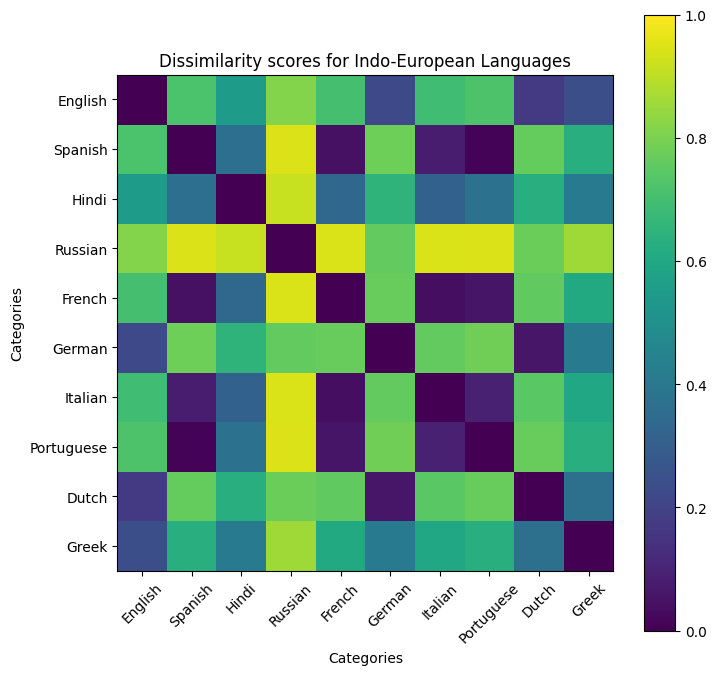

100%|██████████| 7/7 [00:02<00:00,  2.60it/s]


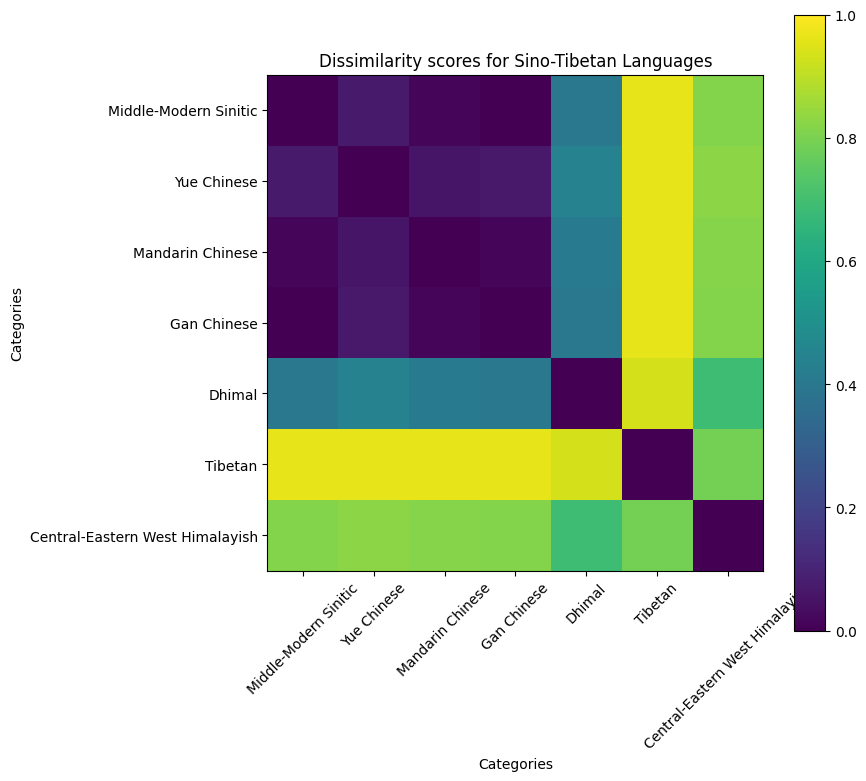

100%|██████████| 5/5 [00:00<00:00,  7.40it/s]


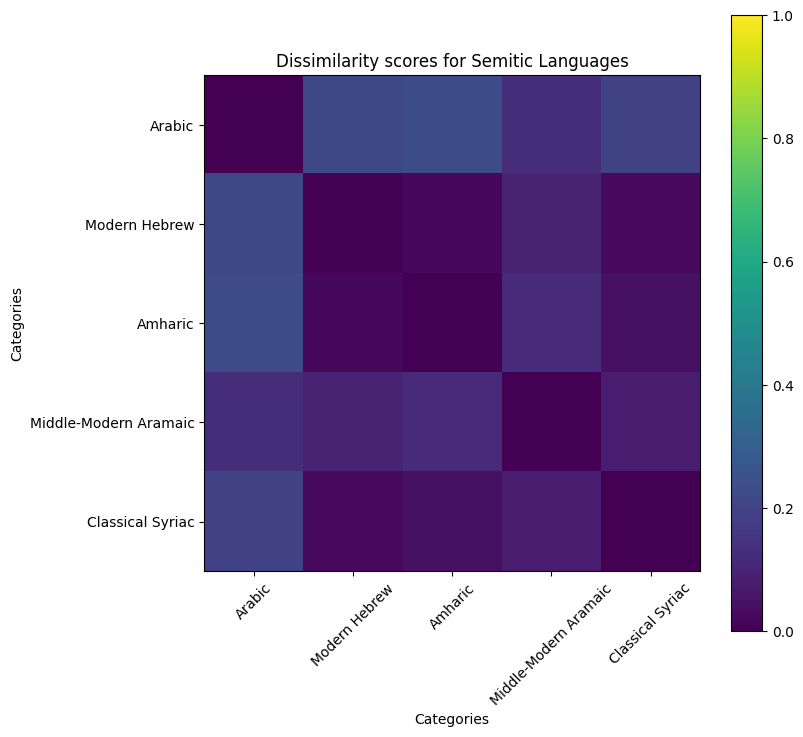

100%|██████████| 4/4 [00:00<00:00,  7.25it/s]


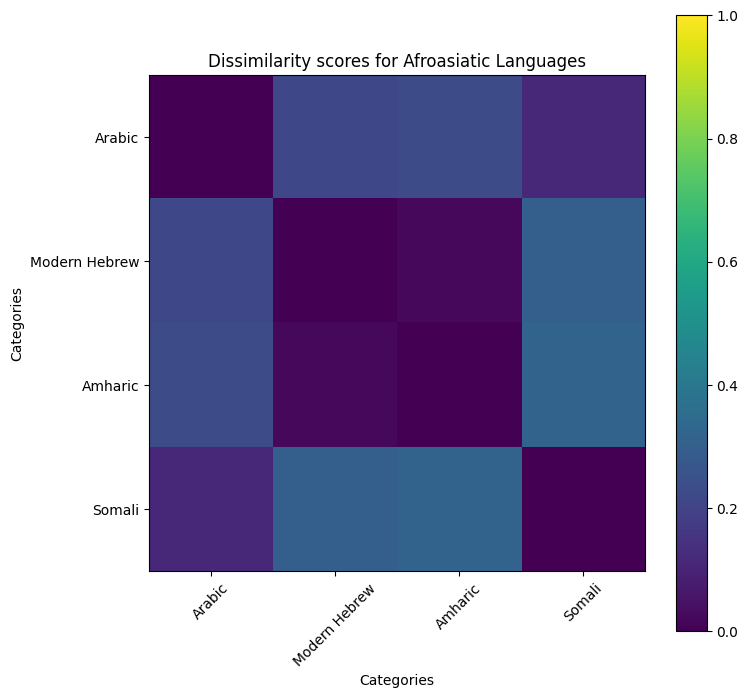

100%|██████████| 5/5 [00:02<00:00,  2.27it/s]


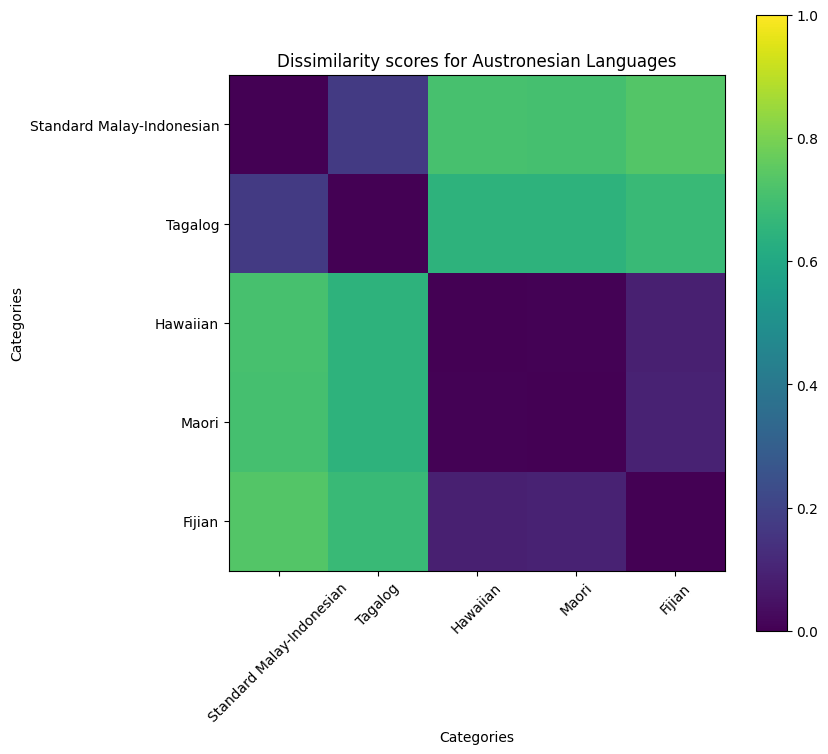

100%|██████████| 4/4 [00:02<00:00,  1.87it/s]


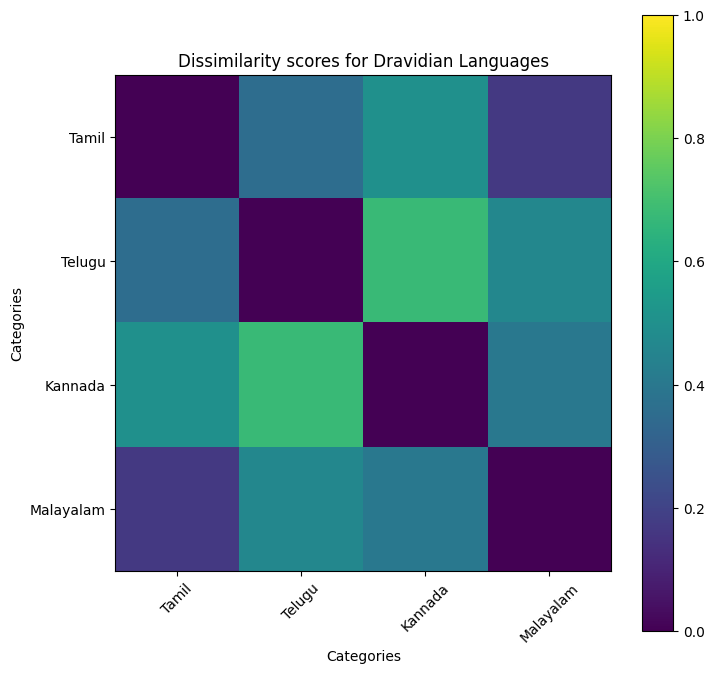

100%|██████████| 5/5 [00:02<00:00,  2.42it/s]


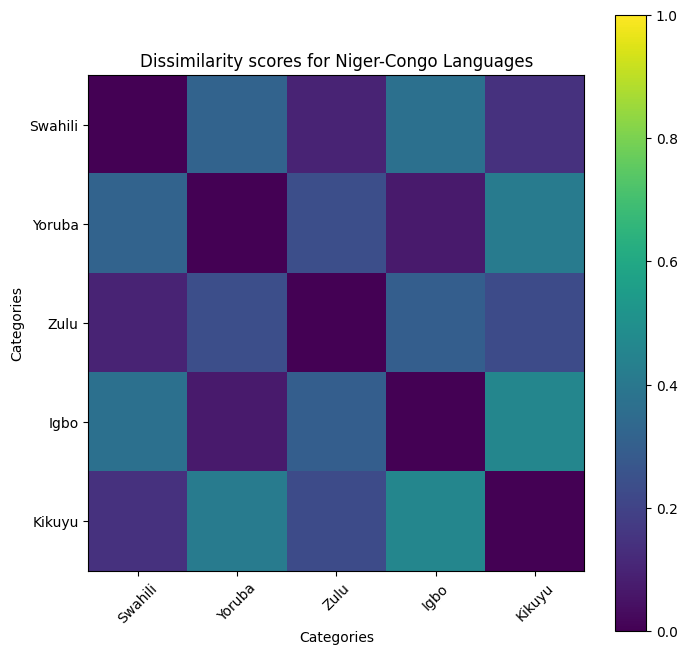

100%|██████████| 3/3 [00:00<00:00,  9.72it/s]


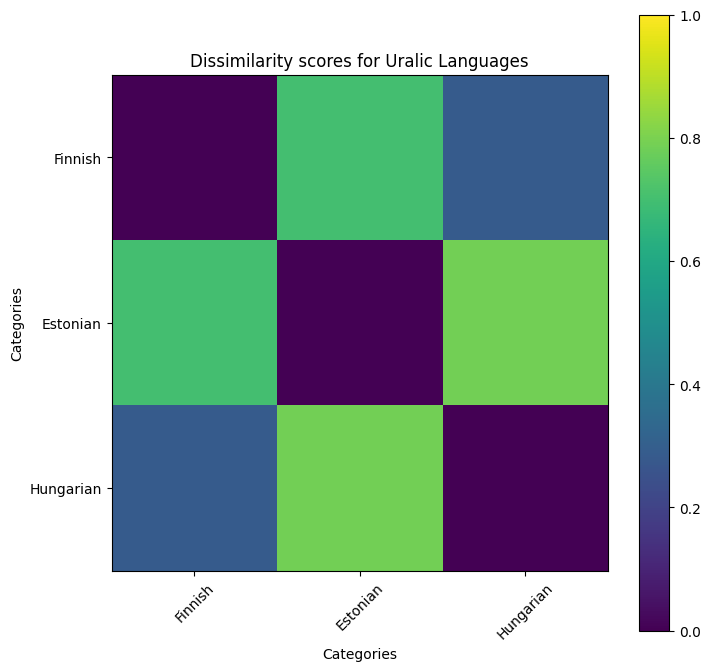

100%|██████████| 4/4 [00:01<00:00,  2.79it/s]


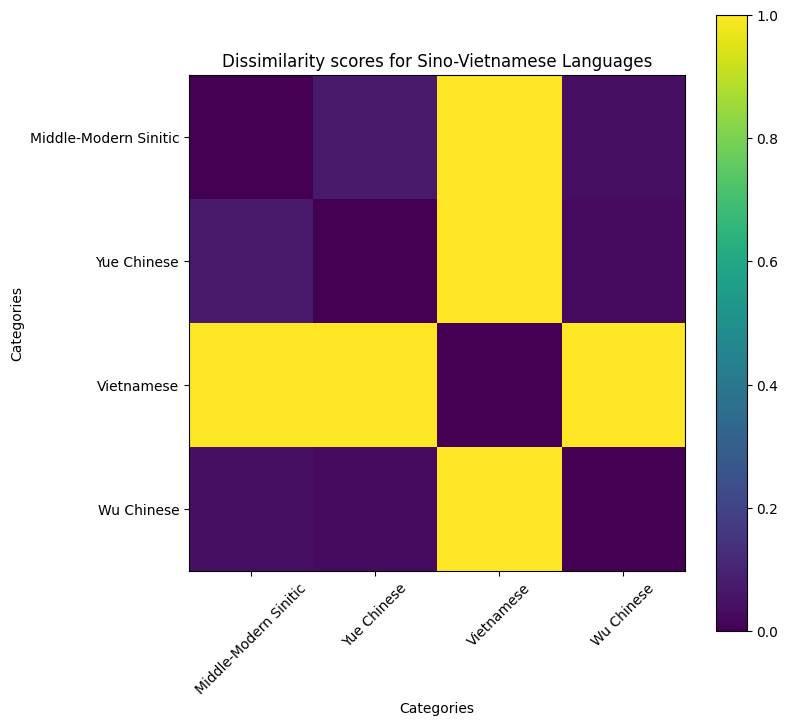

100%|██████████| 5/5 [00:01<00:00,  3.28it/s]


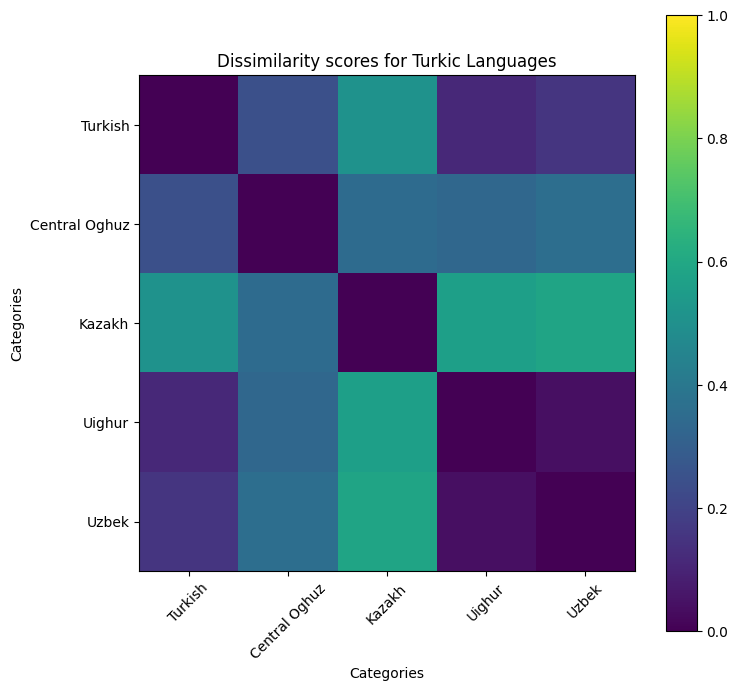

100%|██████████| 3/3 [00:00<00:00,  4.26it/s]


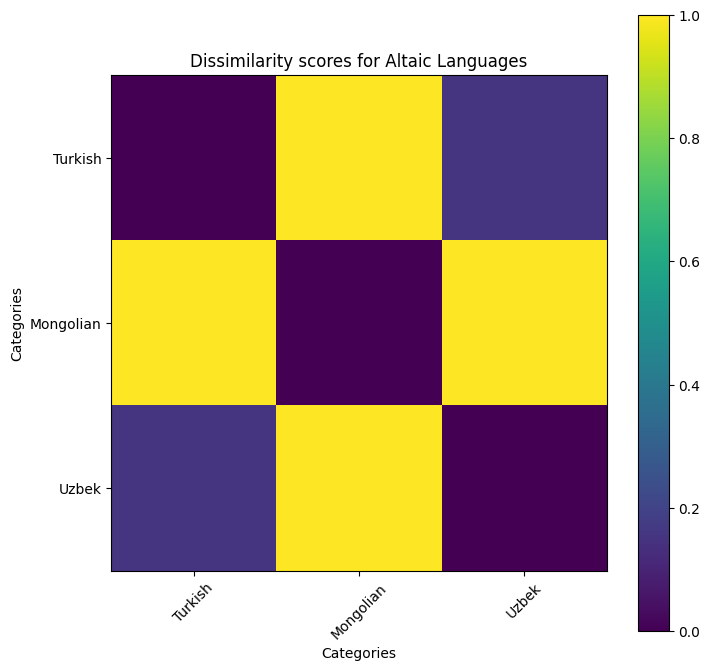

In [ ]:
for family, lg_list in language_families.items():
    dissimilarity_matrix = np.zeros([len(lg_list), len(lg_list)])
    category = []
    position = [i for i in range(len(lg_list))]
    for i, lg_1 in tqdm(enumerate(lg_list), total=len(lg_list)):
        category.append(lg_1)
        for j, lg_2 in enumerate(lg_list):
            dissimilarity_matrix[i][j] = get_distance(lg_1, lg_2)
    plot_rdm_heatmap(dissimilarity_matrix, position, category, size=(8,8), title=f'Dissimilarity scores for {family}')